# Interval  Complexity

Based on [Physics of Music](https://pages.mtu.edu/~suits/scales.html) by B. H. Suits

The table below shows the frequency ratios for notes tuned in the Just and Equal temperament scales. For the equal temperament scale, the frequency of each note in the chromatic scale is related to the frequency of the notes next to it by a factor of the twelfth root of 2 (1.0594630944....). For the Just scale, the notes are related to the fundamental by rational numbers and the semitones are not equally spaced. The most pleasing sounds to the ear are usually combinations of notes related by ratios of small integers, such as the fifth (3/2) or third (5/4). The Just scale is constructed based on the octave and an attempt to have as many of these "nice" intervals as possible. In contrast, one can create scales in other ways, such as a scale based on the fifth only.

In [16]:
table = """<table border=''>
<tbody><tr align='CENTER'>
<th>Interval</th> <th>Ratio to Fundamental<br>Just Scale</th>
<th>Ratio to Fundamental<br>Equal Temperament</th> 
<th>Semitone interval</th>
<th>Complexity</th>
</tr>

<tr align='CENTER'>
<td>Unison</td> <td>1.0000</td> <td>1.0000</td> <td>0</td> <td>0</td>
</tr> 

<tr align='CENTER'>
<td>Minor Second</td> <td>25/24 = 1.0417</td> <td>1.05946</td> <td>1</td> <td>10</td>
</tr>

<tr align='CENTER'>
<td>Major Second</td> <td>9/8 = 1.1250</td> <td>1.12246</td> <td>2</td> <td>8</td>
</tr>

<tr align='CENTER'>
<td>Minor Third</td> <td>6/5 = 1.2000</td> <td>1.18921</td> <td>3</td> <td>5</td>
</tr>

<tr align='CENTER'>
<td>Major Third</td> <td>5/4 = 1.2500</td> <td>1.25992</td> <td>4</td> <td>4</td>
</tr>

<tr align='CENTER'>
<td>Fourth</td> <td>4/3 = 1.3333</td> <td>1.33483</td> <td>5</td> <td>2</td>
</tr>

<tr align='CENTER'>
<td>Diminished Fifth</td> <td>45/32 = 1.4063</td> <td>1.41421</td> <td>6</td> <td>11</td>
</tr>

<tr align='CENTER'>
<td>Fifth</td> <td>3/2 = 1.5000</td> <td>1.49831</td> <td>7</td> <td>1</td>
</tr>

<tr align='CENTER'>
<td>Minor Sixth</td> <td>8/5 = 1.6000</td> <td>1.58740</td> <td>8</td> <td>6</td>
</tr>

<tr align='CENTER'>
<td>Major Sixth</td> <td>5/3 = 1.6667</td> <td>1.68179</td> <td>9</td> <td>3</td>
</tr>

<tr align='CENTER'">
<td>Minor Seventh</td> <td>9/5 = 1.8000</td> <td>1.78180</td> <td>10</td> <td>7</td>
</tr>

<tr align='CENTER'>
<td>Major Seventh</td> <td>15/8 = 1.8750</td> <td>1.88775</td> <td>11</td> <td>9</td>
</tr>

<tr align='CENTER'>
<td>Octave</td> <td> 2.0000</td> <td> 2.0000</td> <td>12</td> <td>0</td>
</tr>

</tbody></table>"""

In [17]:
from IPython.core.display import display, HTML
display(HTML(table))

Interval,Ratio to FundamentalJust Scale,Ratio to FundamentalEqual Temperament,Semitone interval,Complexity
Unison,1.0000,1.0000,0,0
Minor Second,25/24 = 1.0417,1.05946,1,10
Major Second,9/8 = 1.1250,1.12246,2,8
Minor Third,6/5 = 1.2000,1.18921,3,5
Major Third,5/4 = 1.2500,1.25992,4,4
Fourth,4/3 = 1.3333,1.33483,5,2
Diminished Fifth,45/32 = 1.4063,1.41421,6,11
Fifth,3/2 = 1.5000,1.49831,7,1
Minor Sixth,8/5 = 1.6000,1.58740,8,6
Major Sixth,5/3 = 1.6667,1.68179,9,3


# Harmonics

In [6]:
from music21.stream import Stream
from music21.note import Note
from music21.meter import TimeSignature
from music21.clef import TrebleClef
from music21.text import TextBox

from jl_note import Note as JlNote

In [37]:
class HarmonicDrawer(Stream):
    def __init__(self):
        self.stream = Stream()
        self.harmonic_index = 1
        
    def draw(self):
        self.draw_notes()
        # self.draw_captions()
        
        self.stream.show()
        
    def draw_notes(self):
        self.stream.append(TimeSignature('16/4'))
        self.append_sequence('C1', 'C2', 'G2', 'C3', 'E3', 'G3', 'Bb3')
        drawer.stream.append(TrebleClef())
        drawer.append_sequence('C4', 'D4', 'E4', 'F#4', 'G4', 'A4', 'Bb4', 'B4', 'C5')
        
    def draw_captions(self):
        self.add_harmonic_index_caption()
        
    def append_sequence(self,*note_names):
        
        for note_name in note_names:
            self.append_note(note_name)

    def append_note(self,note_name):
        note =  Note(note_name)
        
        self.add_harmonic_index(note)
        self.add_frequency(note)
        self.add_interval_in_semitones(note, note_name)
        self.add_complementary_interval_in_semitones(note,note_name)
        
        self.stream.append(note)
        
    def add_harmonic_index(self, note):
        note.addLyric(self.harmonic_index)
        self.harmonic_index = self.harmonic_index + 1
    
    def add_frequency(self, note):
        freq = f'{note.pitch.frequency:.0f}'
        note.addLyric(freq)
        
    def add_interval_in_semitones(self, note, note_name):
        interval = JlNote.from_Music21_name(note_name).pychord_value
        note.addLyric(interval)
        
    def add_complementary_interval_in_semitones(self, note, note_name):
        interval = JlNote.from_Music21_name(note_name).pychord_value
        note.addLyric(12 - interval if interval != 0 else 0)
        
    def add_harmonic_index_caption(self):
        textBox = TextBox('u', 100, 100)
        textBox.style.fontSize = 3
        # textBox.style.alignVertical = 'bottom'
        self.stream.append(textBox)

    

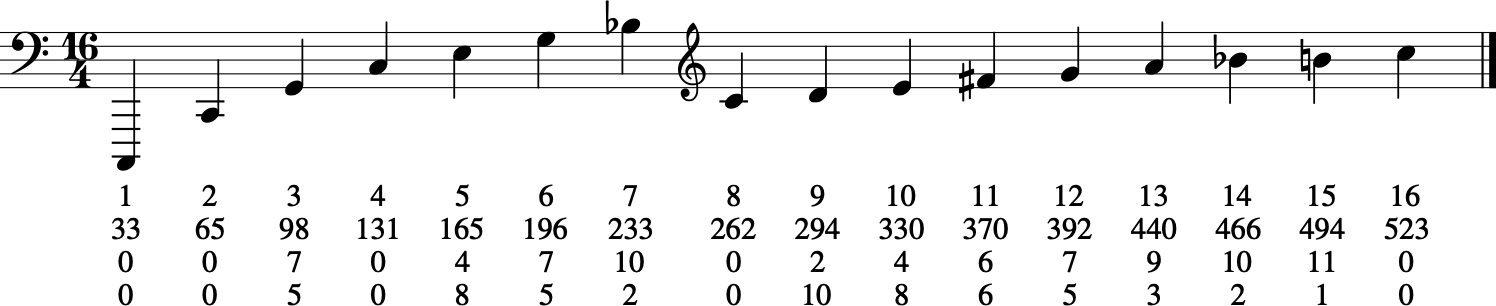

In [38]:
drawer = HarmonicDrawer()

drawer.draw()